# 비지도 학습


***
- **군집** : 비슷한 샘플을 클러스터로 모은다. 군집은 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할등에 사용한다.


- **이상치 탐지** : 정상 데이터가 어떻게 보이는지를 학습한다. 그다음 비정상 샘플을 감지하는 데 사용한다.


- **밀도 추정** : 데이터셋 생성 확률 과정의 확률 밀도 함수를 추정한다. 밀도 추정은 이상치 탐지에 널리 사용되며 밀도가 낮은 영역에 놓인 샘플이 이상치일 가능성이 높다.
***


### 군집

- 비슷한 샘플을 구별해 하나의 클러스터 또는 비슷한 샘플의 그룹으로 할당하는 작업


분류와 마찬가지로 각 샘플은 하나의 그룹에 할당한다(그러나 분류와 달리 군집은 비지도 학습이다.)

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')
iris = load_iris()

In [2]:
data = pd.DataFrame(iris['data'],columns = iris['feature_names'])
data['target'] = iris['target']
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


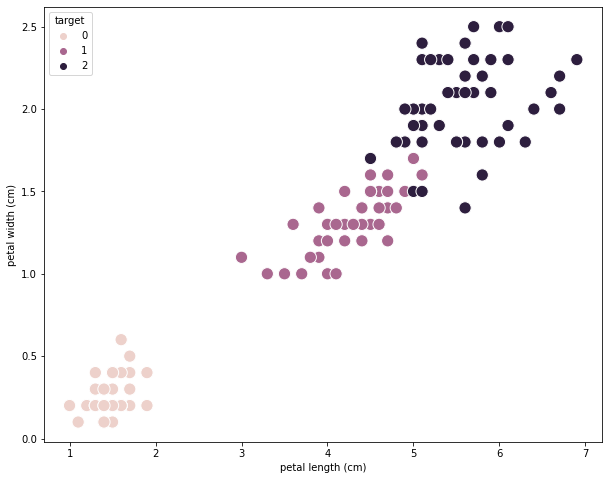

In [3]:
# 레이블이 있는 경우 : 분류
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize= (10,8))
sns.scatterplot(data['petal length (cm)'],data['petal width (cm)'], hue = data['target'], s = 150)
plt.show()

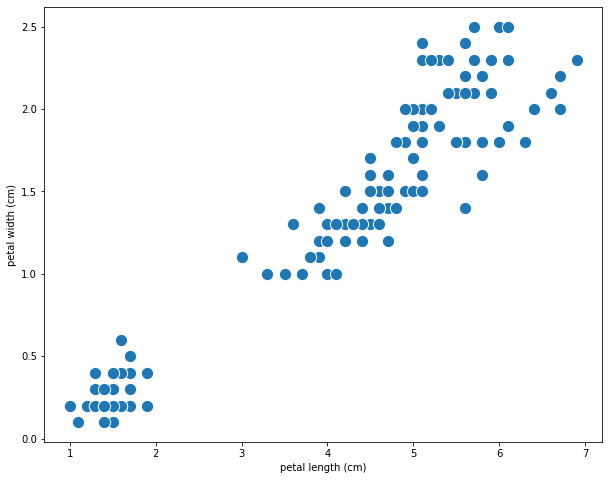

In [4]:
# 레이블이 없는 경우 : 군집
plt.figure(figsize= (10,8))
sns.scatterplot(data['petal length (cm)'],data['petal width (cm)'], s = 150)
plt.show()

In [5]:
data = data[data.columns.difference(['target'])]
target = iris['target']

In [6]:
# 가우시안 혼합 모델을 사용한 클러스터 나누기
from sklearn.mixture import GaussianMixture

In [7]:
y_pred = GaussianMixture(n_components = 3, random_state = 42).fit(data).predict(data)

In [8]:
# mode(최빈값) 사용을 위한 stats 호출
from scipy import stats

# mapping dict 생성
mapping = {}
# 
for class_id in np.unique(target) :
    mode, _ = stats.mode(y_pred[target == class_id])
    mapping[mode[0]] = class_id
mapping

{2: 0, 0: 1, 1: 2}

In [9]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [10]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

In [11]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 군집을 사용하는 예시
***
**고객 분류** : 고객을 구매 이력이나 웹사이트 내 행동 등을 기반으로 클러스터로 모은다. ex) 클러스터 내의 사용자가 좋아하는 컨텐츠를 추천하는 추천시스템

**데이터 분석** : 새로운 데이터를 분석할 떄 군집 알고리즘을 실행하고 각 클러스터를 따로 분석함.

**차원 축소 기법** : 한 데이터셋에 군집 알고리즘을 적용하면 각 클러스터에 대한 샘플의 친화성을 측정할 수 있음.

**이상치 탐지** : 모든 클러스터에 친화성이 낮은 샘플은 이상치일 가능성이 높다. 웹사이트 내 행동을 기반으로 사용자의 클러스터를 만들었다면 초당 웹서버 요청을 비정상적으로 많이 하는 사용자를 감지할 수 있다.(부정 거래 방지 활용)

**준지도 학습** : 레이블된 샘플이 적다면 군집을 수행하고 동일한 클러스터에 있는 모든 샘플에 레이블을 전파할 수 있다.

**검색 엔진** : 데이터베이스에 있는 모든 이미지에 군집 알고리즘을 적용, 사용자가 찾으려는 이미지를 제공하면 훈련된 군집 모델을 사용해 이미지의 클러스터를 찾아 반환
****


## 군집알고리즘 1. K - Means


- 먼저 k개의 센트로이드를 랜덤하게 초기화한다.(데이터 셋에서 k개의 샘플을 랜덤하게 선택하고 센트로이드를 그 위치에 놓는다.

- 수렴할때까지 다음을 반복
> 각 샘플을 가장 가까운 센트로이드에 할당.<br>
> 센트로이드에 할당된 샘플의 평균으로 센트로이드를 업데이트함.

In [12]:
# 예시 데이터
from sklearn.datasets import make_blobs

In [13]:
# 5개의 클러스터 중심 설정
blob_centers = np.array([[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

# 5개의 클러스터 표준편차 설정
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [14]:
# 샘플 2000개, 클러스터 중심 5개인 데이터, 편차 설정 된 데이터 data, target 분리
X, y= make_blobs(n_samples = 2000, centers = blob_centers,
          cluster_std = blob_std, random_state = 42)

In [15]:
# data
X

array([[-2.78161655,  3.06930337],
       [ 0.9528098 ,  2.83816802],
       [-1.92550972,  1.77175736],
       ...,
       [ 0.45543698,  1.63539198],
       [-2.93171319,  2.87760279],
       [-2.803323  ,  1.77918831]])

In [16]:
# target
y

array([3, 0, 1, ..., 0, 3, 2])

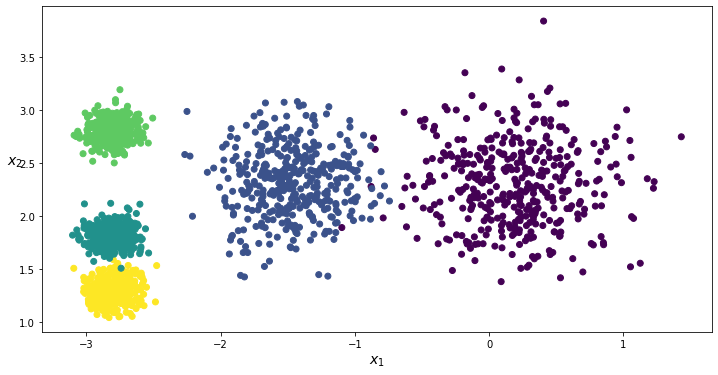

In [17]:
# 데이터 시각화
plt.figure(figsize = (12,6))
plt.scatter(X[:,0],X[:,1], c = y)
plt.xlabel("$x_1$", fontsize = 14)
plt.ylabel("$x_2$", fontsize = 14,rotation  = 0)
plt.show()

In [18]:
# 훈련
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters = k) # n_clusters의 기본값은 8
# X 분류
y_pred = kmeans.fit_predict(X)

In [19]:
# 5개의 클러스터 중 하나에 할당됨
# 알고리즘이 샘플에 할당한 클러스터의 인덱스
y_pred

array([1, 0, 3, ..., 0, 1, 2])

In [20]:
# 5개의 클러스터의 중심
kmeans_center = kmeans.cluster_centers_
kmeans_center

array([[ 0.20925539,  2.30351618],
       [-2.79846237,  2.80004584],
       [-2.80372723,  1.80873739],
       [-1.4453407 ,  2.32051326],
       [-2.79244799,  1.2973862 ]])

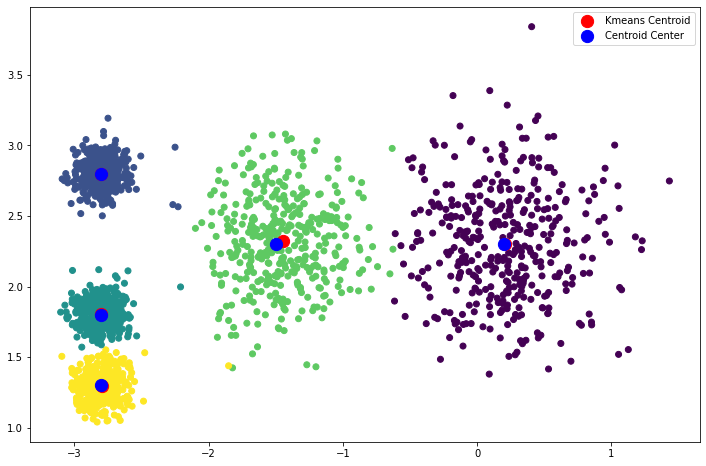

In [21]:
# 클러스터 중심 시각화
plt.figure(figsize = (12,8))
# y_pred로 구분한 결과
plt.scatter(X[:,0],X[:,1], c = y_pred)
plt.scatter(kmeans_center[:,0],kmeans_center[:,1], label = "Kmeans Centroid", s = 150, c = "r")
plt.scatter(blob_centers[:,0],blob_centers[:,1], c = 'b', s = 150, label = "Centroid Center")
plt.legend()
plt.show()

In [22]:
# 새로운 샘플을 kmeans 모델에 대입한 결과 가장 가까운 1번 클러스터에 할당되었다.
x_new = np.array([[1,2]])
kmeans.predict(x_new)

array([0])

In [23]:
# 샘플과 각 클러스터 사이의 거리
kmeans.transform(x_new)

array([[0.84699416, 3.88180238, 3.80853282, 2.46625625, 3.8569843 ]])

In [24]:
kmeans.score(X)

-213.4217713125892

## K - means 알고리즘 반복할 때의 차이 보기


- **init** : 초기화 방법, random이면 무작위, kmeans++이면 kmeans ++ 방법<br>
- **init_n** : 초기 중심위치 시도 횟수, 디폴트는 10이며 10개의 무작위 중심위치 목록중 가장 좋은 위치 선정
- **max_iter** : 최대 반복 횟수

In [25]:
X, _ = make_blobs(n_samples= 40, random_state= 8)

# 군집의 개수 2개, max_iter는 지정 값
# 1번째 군집과 2번째 군집에 해당하는 샘플을 각각 scatter plot
# 모델링한 군집의 center를 각각 scatter plot
def plot_kmeans(n) :
    model = KMeans(n_clusters = 2, max_iter = n, random_state = 10, n_init = 1, init = 'random').fit(X)
    c0, c1 = model.cluster_centers_
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1])
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1])
    plt.scatter(c0[0],c0[1], label = 'Kmeans Centroid', s = 150, c = 'r')
    plt.scatter(c1[0],c1[1], label = 'Kmeans Centroid', s = 150, c = 'r')
    plt.title("max_iter = {}, score = {:.2f}".format(n, model.score(X)))
    plt.grid(False)

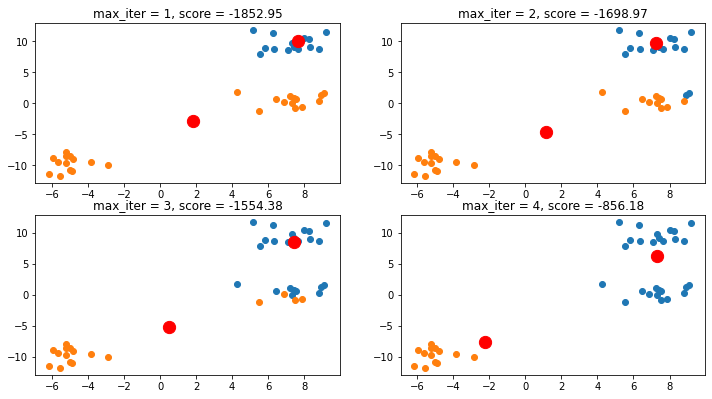

In [26]:
plt.figure(figsize = (12,10))
plt.subplot(321)
plot_kmeans(1)
plt.subplot(322)
plot_kmeans(2)
plt.subplot(323)
plot_kmeans(3)
plt.subplot(324)
plot_kmeans(4)
plt.show()

각 단계에서 중심위치는 전단계의 군집의 평균에서 다시 계산됨을 볼 수 있다.

score가 음수 인 이유는 사이킷런의 score메소드는 항상 높은 값이 좋은 값이기 때문

## 이너셔

- 최선의 모델을 선택하려면 K-평균 모델의 성능을 평가할 방법이 있어야한다. 그러나 비지도학습은 타깃이 없기 때문에 샘플과 센트로이드의 거리를 측정한다. 이것이 **이너셔 지표**이다.

In [27]:
# 이너셔
model = KMeans(n_clusters = 2, max_iter = 4, random_state = 10, n_init = 1, init = 'random').fit(X)
model.inertia_

856.1776356073849

이너셔는 각 훈련 샘플과 센트로이드의 사이의 거리 제곱의 합으로 검증이 가능하다.

## hard clustering

- 하나의 데이터가 정확히 하나의 군집에 할당하는 것

## soft clustering

- 하나의 데이터가 다수의 군집에 할당하는 것

## mini batch k - means

기존의 k - means 방법에서는 중심위치와 모든 데이터 사이의 거리를 계산해야 하기 때문에 데이터의 갯수가 많아지면 계산량도 늘어난다.

mini batch k - means는 데이터를 미니배치 크기만큼 무작위로 분리하여 계산량을 줄인다.

In [28]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 150000, cluster_std = [1.0,2.5,0.5], random_state = 170)

In [29]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

In [30]:
%%time
# 기존의 kmeans

model1 = KMeans(n_clusters = 3).fit(X)

Wall time: 1 s


In [31]:
%%time
# minibatchkmeans
# batch 크기를 설정하는 batch_size를 추가

model2 = MiniBatchKMeans(n_clusters = 3, batch_size = 1000, compute_labels = True).fit(X)

Wall time: 141 ms


미니배치 군집의 계산 속도가 더 빠르다.

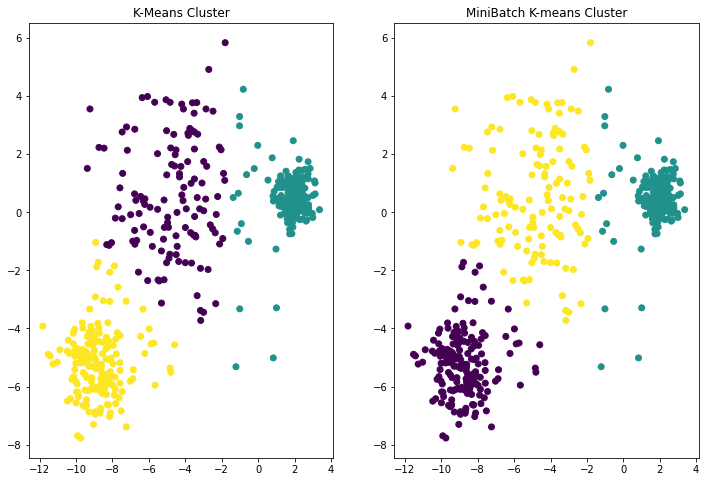

In [32]:
# 500개만 출력
idx = np.random.randint(150000, size = 500)
plt.figure(figsize = (12,8))
# 1번 그래프
plt.subplot(121)
plt.scatter(X[idx,0],X[idx,1], c = model1.labels_[idx])
plt.title("K-Means Cluster")
# 2번 그래프
plt.subplot(122)
plt.scatter(X[idx,0],X[idx,1], c = model2.labels_[idx])
plt.title("MiniBatch K-means Cluster")
plt.show()

결과 차이는 거의 없다.

## 이너셔의 문제점

- 이너셔는 샘플과 센트로이드의 거리를 지표로 한다. 따라서 클러스터 k의 개수가 증가함에 따라 이너셔는 점점 줄어들게 된다.


## 최적의 클러스터 찾기

In [33]:
kmeans_per = [KMeans(n_clusters = k, random_state = 42).fit(X) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per]

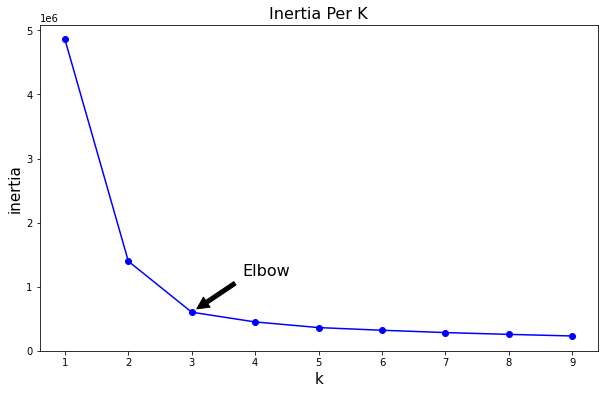

In [34]:
plt.figure(figsize = (10,6))
plt.plot(range(1,10), inertias, "bo-")
plt.xlabel("k", fontsize = 15)
plt.ylabel("inertia", fontsize = 15)
plt.annotate('Elbow', # 주석 내용
            xy = (3, inertias[2]), # 텍스트 좌표
            xytext = (0.4,0.3), # 출력 좌표 
            textcoords = 'figure fraction', # figure fraction : 그림의 좌표를 기준으로 출력
            fontsize = 16,
            arrowprops=dict(facecolor='black', shrink=0.1)) # 화살표 특성을 설정 : 주석이 달린 지점에서 0.1퍼센트 떨어진 곳으로 이동
plt.title('Inertia Per K', fontsize = 16)
plt.show()

이너셔 그래프를 클러스터 개수 k의 함수로 그렸을 때 그래프가 꺾이는 지점을 **엘보(elbow)**라고 부르며
k = 3보다 작을경우 나쁜 값을 얻는다.

또다른 방법으로는 **실루엣 점수** 점수를 구하는 것이다. 실루엣 점수는 실루엣의 평균으로 계산하는 것이며 한 샘플의 실루엣 계수는 
$(b-a)/max(a,b)

$a$ : 동일한 클러스터에 있는 다른 샘플까지 평균 거리 <br>
$b$ : 가장 가까운 클러스터까지 평균 거리

실루엣 계수는 -1에서 +1까지 범위를 가지며, +1에 가까우면 자신의 클러스터 안에 잘 속해 있고 다른 클러스터와 멀리 떨어져 있음을 의미한다.
-1에 가까우면 이 샘플이 잘못된 클러스터에 할당되었다는 의미를 가진다.

In [35]:
X, _ = make_blobs(n_samples= 1500, random_state= 8)
kmeans_per = [KMeans(n_clusters = k, random_state = 42).fit(X) for k in range(1,10)]

In [36]:
%%time
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per[1:]]

Wall time: 393 ms


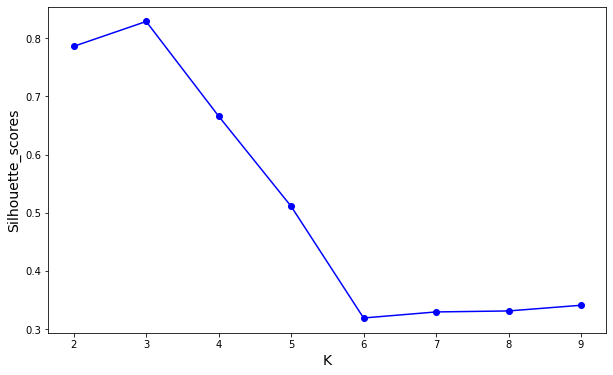

In [37]:
plt.figure(figsize = (10,6))
plt.plot(range(2,10),silhouette_scores,'bo-')
plt.xlabel("K", fontsize = 14)
plt.ylabel("Silhouette_scores", fontsize = 14)
plt.show()

시각화를 통해 k가 2,3일 때 최적의 클러스터 수 임을 알 수 있다.(이너셔를 통해 볼 때와는 다른 결과)

## 군집을 사용한 전처리

- 군집은 지도 학습 알고리즘을 적용하기 전에 전처리 단계로 사용할 수 있다.


- load_digits : 0에서 9까지 숫자를 나타내는 8 x 8 크기 흑백 이미지 1797개 데이터셋

In [38]:
# return_X_y 매개변수를 True로 지정하여 특성 X와 타깃 y로 반환
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y = True)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_digits, y_digits)

In [40]:
# logistic회귀 훈련
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [41]:
# 정확도
log_reg.score(X_test,y_test)

0.9644444444444444

In [42]:
# 파이프라인을 통해 50개의 클러스터 수집, 50개 클러스터까지 거리로 변환, 로지스틱 회귀 적용
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters = 50)),
    ("log_reg", LogisticRegression()),
])

In [43]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression())])

In [44]:
# 정확도가 약간 올라감.
pipeline.score(X_test,y_test)

0.9466666666666667

In [45]:
# 클러스터 개수 k를 임의로 정하여 최적의 클러스터 개수를 찾기
from sklearn.model_selection import GridSearchCV
# 2~99개의 클러스터  
param_grid = dict(kmeans__n_clusters = range(2,100))
#3번의 교차검증, verbose = 2 : 파라미터 별 메시지 출력, default = 0 메시지 출력 x
grid_clf = GridSearchCV(pipeline, param_grid, cv = 3, verbose = 2)

grid_clf.fit(X_train,y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s



[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.2s
[CV] 

[CV] ............................ kmeans__n_clusters=22, total=   0.4s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   0.4s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   0.4s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   0.5s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   0.4s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   0.4s
[CV] kmeans__n_clusters=24 ...........................................
[CV] ............................ kmeans__n_clusters=24, total=   0.4s
[CV] kmeans__n_clusters=24 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=41, total=   0.6s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   0.6s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   0.6s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   0.6s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   0.6s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   0.6s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   0.6s
[CV] kmeans__n_clusters=43 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=60, total=   0.7s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   0.7s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   0.7s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   0.7s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   0.8s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   0.8s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   0.8s
[CV] kmeans__n_clusters=63 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=80, total=   0.9s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   0.9s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   0.9s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   1.0s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   0.9s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   0.9s
[CV] kmeans__n_clusters=82 ...........................................
[CV] ............................ kmeans__n_clusters=82, total=   1.0s
[CV] kmeans__n_clusters=82 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=99, total=   1.1s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=   1.1s


[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed:  3.3min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [46]:
# 최고의 클러스터 개수
grid_clf.best_params_

{'kmeans__n_clusters': 58}

In [47]:
# 성능 확인
grid_clf.score(X_test,y_test)

0.9577777777777777

## 군집을 사용한 준지도 학습

군집을 사용하는 또 다른 사례는 준지도 학습이다

레이블이 없는 데이터가 많고 레이블이 있는 데이터는 적을 때 사용한다.

In [48]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled],y_train[:n_labeled])

LogisticRegression()

In [49]:
log_reg.score(X_test,y_test)

0.8

개선 방안 : 먼저 훈련 세트를 50개의 클러스터로 모음.